In [1]:
#number_of_streamlines.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 11 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['2/', '3/', '4/', '5/', '6/', '7/', '8/', '9/', '10/', '11/', '12/', '13/', '14/']
from helper_fns import *
from libration import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, monitor = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
    print 'dir = ', dir
    print 'output_folder = ', output_folder
    print 'shear_viscosity = ', shear_viscosity
    print 'bulk_viscosity = ', bulk_viscosity
    print 'total_ring_mass = ', total_ring_mass
    print 'radial_width = ', radial_width
    print 'number_of_streamlines = ', number_of_streamlines
    print 'G_ring = ', G_ring
    print 'J2 = ', J2
    print 'r.shape = ', r.shape
    print 'viscous_timescale = ', viscous_timescale
    times_viscous = times/viscous_timescale
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    everything += [(r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime)]

dir =  2/
output_folder =  2/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  1e-10
radial_width =  0.0001
number_of_streamlines =  2
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  3/
output_folder =  3/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  1e-10
radial_width =  0.0001
number_of_streamlines =  3
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 3, 241)
viscous_timescale =  8333.333333333332
dir =  4/
output_folder =  4/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  1e-10
radial_width =  0.0001
number_of_streamlines =  4
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 4, 241)
viscous_timescale =  8333.333333333332
dir =  5/
output_folder =  5/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
total_ring_mass =  1e-10
radial_width =  0.0001
number_of_streamlines =  5
G_ring =  1.0
J2 =  0.01
r.shape =  (1001, 5, 241)
viscous_timescale =  8333.333333333332


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

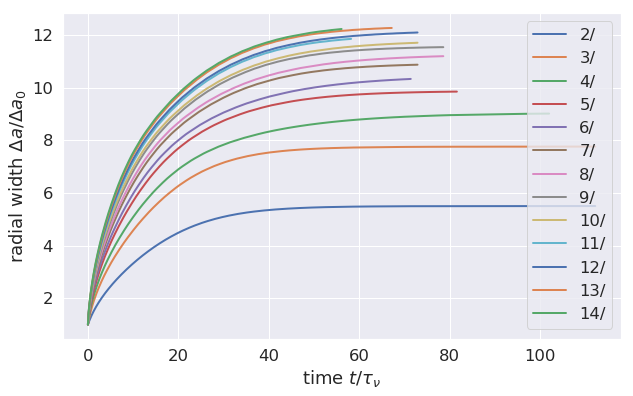

In [4]:
#plot delta_a versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    x = times_viscous
    y = da/da[0]
    label = dir
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=label)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()
p = plt.savefig('figs/a_versus_t_streamlines.pdf', bbox_inches='tight')

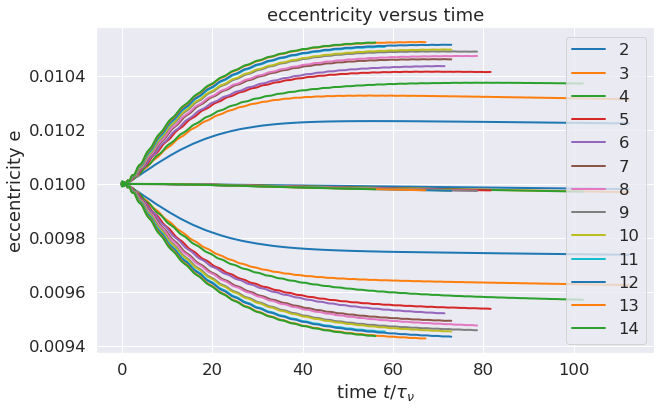

In [5]:
#plot eccentricity versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    x = times_viscous
    y = e_outer
    color = color_seq[idx%10]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=None, color=color)
    y = e_avg
    label = str(number_of_streamlines)
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=label, color=color)
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=None, color=color)
p = ax.set_title('eccentricity versus time')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='center right')

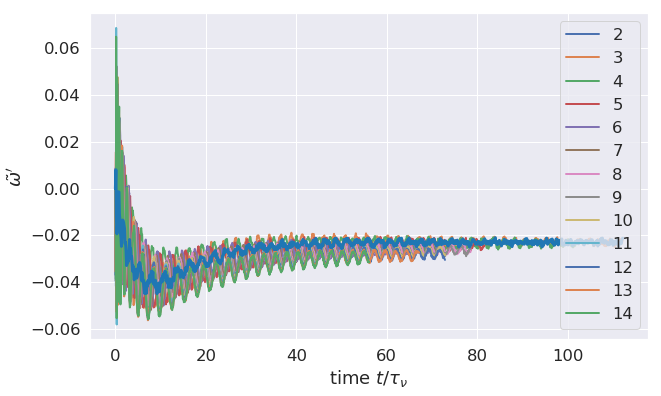

In [6]:
#plot dwt versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    x = times_viscous
    y = wt_prime
    label = str(number_of_streamlines)
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=label)
    if (idx == 0):
        x2 = x
        y2 = y
        color = color_seq[0]
p = ax.plot(x2, y2, linestyle='-', linewidth=3, color=color)
p = ax.set_ylabel(r"$\tilde{\omega}'$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

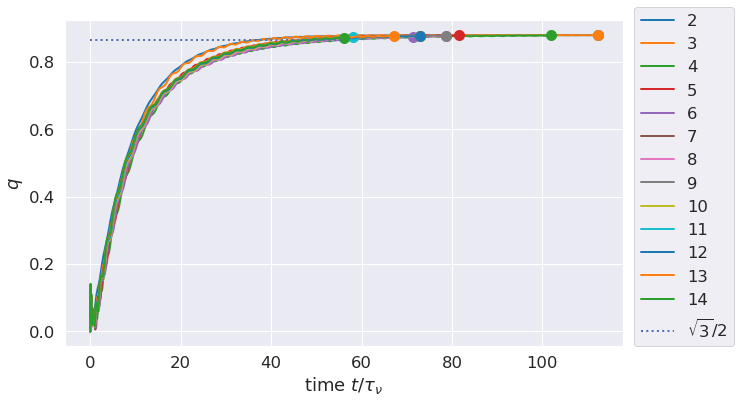

In [7]:
#plot q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    x = times_viscous
    y = q
    label = str(number_of_streamlines)
    color = color_seq[idx%len(color_seq)]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=label, color=color)
    idx = (x == x.max())
    p = ax.plot(x[idx], y[idx], marker='o', markersize=10, color=color)
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel(r"$q$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc=(1.02, 0.0))

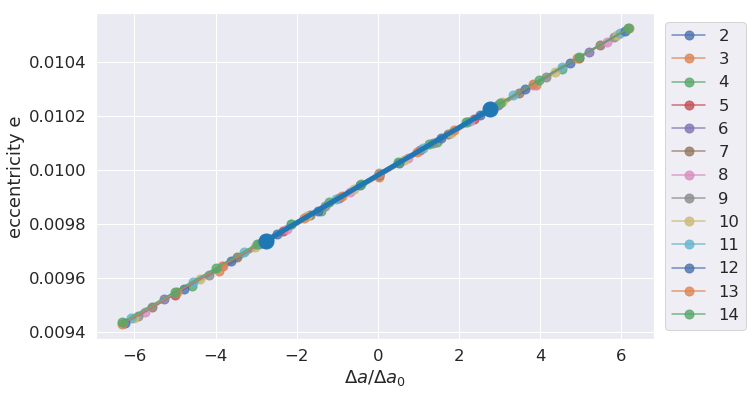

In [8]:
#plot e versus a
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    tm = total_number_of_outputs - 1
    x = a[tm].mean(axis=1)
    x -= x.mean()
    x = x/radial_width
    y = e[tm].mean(axis=1)
    label = str(number_of_streamlines)
    p = ax.plot(x, y, linestyle='-', markersize=9, alpha=0.8, marker='o', label=label)
    if (idx == 0):
        x2 = x
        y2 = y
        color = color_seq[0]
p = ax.plot(x2, y2, linestyle='-', markersize=15, linewidth=5, marker='o', color=color)
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'$\Delta a/\Delta a_0$')
p = plt.legend(loc=(1.02, 0.03))
p = plt.savefig('figs/e_vs_da_streamlines.pdf', bbox_inches='tight')

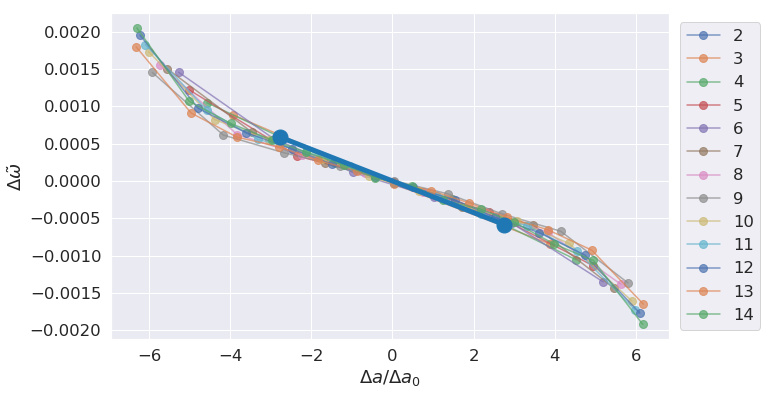

In [9]:
#plot final wt versus a
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    tm = total_number_of_outputs - 1
    x = a[tm].mean(axis=1)
    x -= x.mean()
    x = x/radial_width
    y = wt[tm].mean(axis=1)
    y -= y.mean()
    label = str(number_of_streamlines)
    p = ax.plot(x, y, linestyle='-', markersize=8, alpha=0.7, marker='o', label=label)
    if (idx == 0):
        x2 = x
        y2 = y
        color = color_seq[0]
p = ax.plot(x2, y2, linestyle='-', markersize=15, linewidth=5, marker='o', color=color)
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = ax.set_xlabel(r'$\Delta a/\Delta a_0$')
p = plt.legend(loc=(1.02, 0.03))

min times_viscous_max =  56.10000000000001


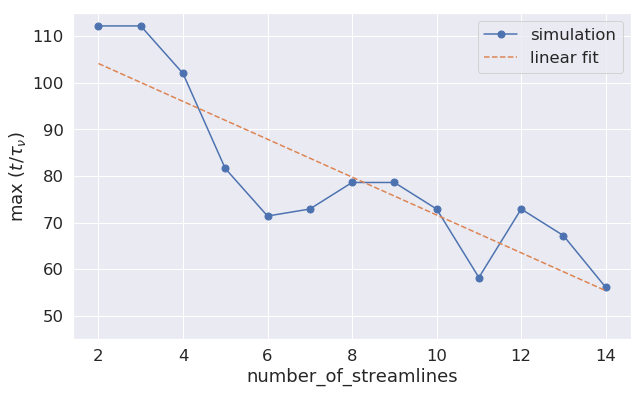

In [10]:
#plot final time before sim ends/crashes
data = []
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    times_viscous_max = times_viscous.max()
    d = {'number_of_streamlines':number_of_streamlines, 'times_viscous_max':times_viscous_max}
    data += [d]
df = pd.DataFrame(data=data)
print 'min times_viscous_max = ', df.times_viscous_max.min()
f, ax = plt.subplots(figsize=(10, 6))
x = df.number_of_streamlines
y = df.times_viscous_max
p = ax.plot(x, y, linestyle='-', markersize=7, marker='o', label='simulation')
coef = np.polyfit(x, y, 1)
fit_fn = np.poly1d(coef)
y = fit_fn(x)
p = ax.plot(x, y, linestyle='dashed', label='linear fit')
p = ax.set_ylabel(r'max $(t/\tau_\nu)$')
p = ax.set_xlabel('number_of_streamlines')
p = ax.set_ylim(45, 115)
p = ax.legend()

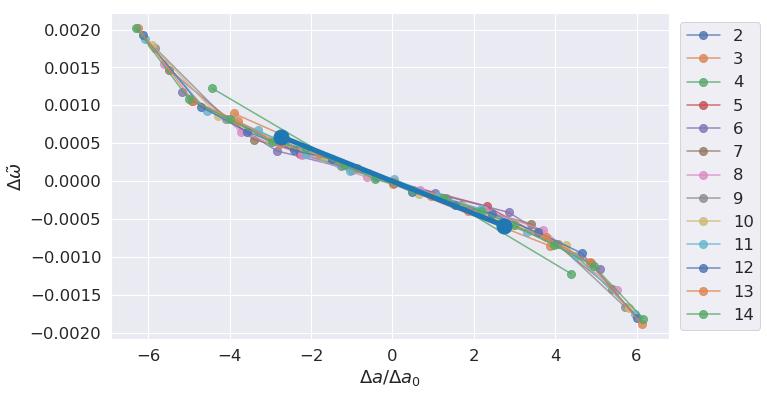

In [11]:
#plot wt versus a at time t/tau_nu=56
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    tm = np.where(times_viscous > 56.0)[0][0]
    x = a[tm].mean(axis=1)
    x -= x.mean()
    x = x/radial_width
    y = wt[tm].mean(axis=1)
    y -= y.mean()
    label = str(number_of_streamlines)
    p = ax.plot(x, y, linestyle='-', markersize=8, alpha=0.8, marker='o', label=label)
    if (idx == 0):
        x2 = x
        y2 = y
        color = color_seq[0]
p = ax.plot(x2, y2, linestyle='-', markersize=15, linewidth=5, marker='o', color=color)
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = ax.set_xlabel(r'$\Delta a/\Delta a_0$')
p = plt.legend(loc=(1.02, 0.03))
p = plt.savefig('figs/delta_wt_vs_da_streamlines.pdf', bbox_inches='tight')